In [ ]:
Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [1]:
!pip install tensorflow
!pip install keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 3.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 76.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 52.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 72.3 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 84.2 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 77.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.9/93.9 kB 16.4 MB/s eta 0:0

In [3]:
import tensorflow as tf
import keras

In [4]:
print(tf.__version__)
print(keras.__version__)

2.13.0
2.13.1


In [ ]:
Q2. Load the Wine Quality dataset and explore its dimensions.

In [5]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
print(df.shape)
print(df.head())

(1599, 12)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.

In [ ]:
Q3. Check for null values, identify categorical variables, and encode them.

In [6]:
# Check for null values
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [7]:
# Identify categorical variables
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)

Index([], dtype='object')


In [9]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
Q4. Separate the features and target variables from the dataframe.

In [10]:
X = df.drop('quality', axis=1)
y = df['quality']

In [ ]:
Q5. Perform a train-test split and divide the data into training, validation, and test datasets.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [ ]:
Q6. Perform scaling on the dataset.

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
Q7. Create at least 2 hidden layers and an output layer for the binary categorical variables.

In [13]:
from tensorflow.keras import layers
hidden_layer_1 = layers.Dense(64, activation='relu', input_shape=(X.shape[1],))
hidden_layer_2 = layers.Dense(32, activation='relu')
output_layer = layers.Dense(1, activation='sigmoid')

In [ ]:
Q8. Create a Sequential model and add all the layers to it.

In [14]:
from tensorflow.keras import Sequential
model = Sequential([hidden_layer_1, hidden_layer_2, output_layer])

In [ ]:
Q9. Implement a TensorBoard callback to visualize and monitor the model's training process.

In [15]:
from tensorflow.keras.callbacks import TensorBoard
tensorboard_callback = TensorBoard(log_dir='logs', histogram_freq=1)

In [ ]:
Q10. Use Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training if no improvement is observed.

In [16]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
Q11. Implement a ModelCheckpoint callback to save the best model based on a chosen metric during training.

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint
model_checkpoint_callback = ModelCheckpoint(filepath='best_model.h5',
                                            monitor='val_accuracy',
                                            save_best_only=True)

In [ ]:
Q12. Print the model summary.

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
Q13. Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy'].

In [19]:
loss_function = 'binary_crossentropy'
optimizer = 'adam'
metrics = ['accuracy']

In [ ]:
Q14. Compile the model with the specified loss function, optimizer, and metrics.

In [20]:
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=metrics)

In [ ]:
Q15. Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint callbacks.

In [21]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    validation_data=(X_val, y_val),
                    callbacks=[tensorboard_callback,
                               early_stopping_callback,
                               model_checkpoint_callback])

Epoch 1/20
30/30 [==============================] - 1s 14ms/step - loss: -3.3377 - accuracy: 0.0000e+00 - val_loss: -8.1938 - val_accuracy: 0.0000e+00
Epoch 2/20
30/30 [==============================] - 0s 5ms/step - loss: -15.8326 - accuracy: 0.0000e+00 - val_loss: -24.9588 - val_accuracy: 0.0000e+00
Epoch 3/20
 1/30 [>.............................] - ETA: 0s - loss: -25.1609 - accuracy: 0.0000e+00

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


30/30 [==============================] - 0s 5ms/step - loss: -42.0646 - accuracy: 0.0000e+00 - val_loss: -60.1166 - val_accuracy: 0.0000e+00
Epoch 4/20
30/30 [==============================] - 0s 5ms/step - loss: -94.5307 - accuracy: 0.0000e+00 - val_loss: -126.4172 - val_accuracy: 0.0000e+00
Epoch 5/20
30/30 [==============================] - 0s 4ms/step - loss: -188.1089 - accuracy: 0.0000e+00 - val_loss: -237.8910 - val_accuracy: 0.0000e+00
Epoch 6/20
30/30 [==============================] - 0s 5ms/step - loss: -340.0299 - accuracy: 0.0000e+00 - val_loss: -410.9395 - val_accuracy: 0.0000e+00
Epoch 7/20
30/30 [==============================] - 0s 4ms/step - loss: -568.8198 - accuracy: 0.0000e+00 - val_loss: -661.7159 - val_accuracy: 0.0000e+00
Epoch 8/20
30/30 [==============================] - 0s 5ms/step - loss: -889.9286 - accuracy: 0.0000e+00 - val_loss: -1004.6999 - val_accuracy: 0.0000e+00
Epoch 9/20
30/30 [==============================] - 0s 5ms/step - loss: -1319.6752 - accu

In [ ]:
Q16. Get the model's parameters.

In [22]:
print(model.get_weights())

[array([[-1.0123082 ,  1.0504613 , -1.2601558 , -1.0393943 ,  1.299079  ,
        -0.7976692 , -1.191885  , -0.9840379 ,  1.0967469 , -0.9650766 ,
         1.0590404 , -0.9755637 , -0.5677145 , -0.76890486, -1.0412264 ,
        -1.2878836 , -0.57685155, -1.0626775 ,  0.9077743 ,  1.0562083 ,
         1.2019049 ,  0.8137846 ,  1.1267315 ,  1.0591686 , -1.1029687 ,
        -0.9359939 ,  0.9050794 ,  1.2688477 , -1.1596591 ,  1.235435  ,
        -1.0699512 ,  0.89496374,  0.8437621 ,  0.976024  ,  0.78564614,
        -0.53097296, -1.3439248 , -1.1796955 , -1.0780448 ,  0.77428883,
        -1.3049879 ,  1.2413317 , -1.3107013 , -0.6677517 ,  1.0075572 ,
        -0.717974  ,  0.98750484,  1.2013203 ,  0.7988806 , -1.2747407 ,
        -1.2977543 , -0.82015055, -1.2010955 , -0.8468222 ,  0.96584886,
         0.9341655 ,  0.72402877, -1.1671417 ,  1.2309413 , -0.42907187,
         1.2730591 ,  0.4520532 ,  0.5613035 ,  1.2726212 ],
       [ 0.9625068 , -0.9409816 ,  1.0576832 ,  0.8125322 , -1

In [ ]:
Q17. Store the model's training history as a Pandas DataFrame.

In [23]:
history_df = pd.DataFrame(history.history)

In [ ]:
Q18. Plot the model's training history.

<AxesSubplot: >

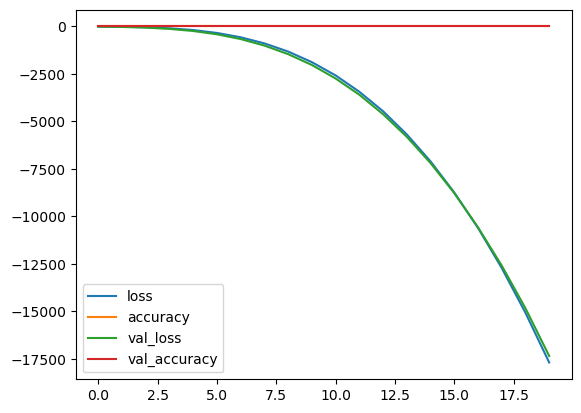

In [24]:
history_df.plot()

In [ ]:
Q19. Evaluate the model's performance using the test data.

In [25]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 1ms/step - loss: -19530.8652 - accuracy: 0.0000e+00


[-19530.865234375, 0.0]